
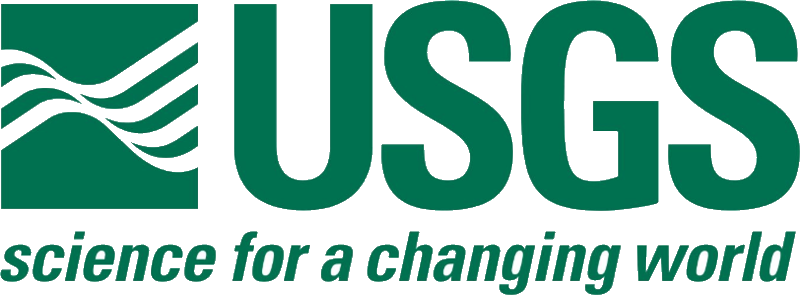

<h1><u><b><font color="#00824a">GHISA Visualization Application</font></u></b></h1>

Use this application to visualize GHISA spectral data available to download from LP DAAC.


<h3><b><font color="#00824a">Links to LP DAAC & GHISA Resources:</font></b></h1>
<ul>
<li><a href="https://lpdaac.usgs.gov/products/ghisaconusv001/">GHISA CONUS</a></li>

<li><a href="https://lpdaac.usgs.gov/products/ghisacasiav001/">GHISA Central Asia</a></li>

<li><a href="https://www.usgs.gov/centers/western-geographic-science-center/science/global-hyperspectral-imaging-spectroscopy">GHISA Main Website</a></li>
<ul>


In [1]:
#%%capture

# if on Google CoLab, install packages into base environment 
import os
if 'COLAB_GPU' in list(os.environ):

    #@title 1. First Time Requirement Installation
    #@markdown Downloads and installs required packages. Click 'Restart Runtime' once complete. (~1 minute)
    #First time setup - Installs all required components
    !pip install geemap -U &> /dev/null
    !pip install ipyleaflet -U &> /dev/null
    !pip install ipywidgets -U &> /dev/null
    !pip install ipympl -U &> /dev/null
    !pip install npm -U &> /dev/null
    !pip install panel -U &> /dev/null
    !pip install hvplot -U &> /dev/null
    #!pip uninstall tornado -y
    !pip install tornado==5.1.1 -U &> /dev/null

    # RESTART KERNEL AFTER THIS CODE HAS BEEN RUN

In [ ]:
#@title 2. Import Dependencies & Data
#@markdown Imports and activates required packages, as well as all source data. (~1 minute)
#Import dependencies
import pandas as pd
import numpy as np
import geopy
#import geemap
import panel as pn
import hvplot.pandas
import holoviews as hv

## CODE FOR MAP - NOT IMPLEMENTED ##

#from bokeh.models import SingleIntervalTicker, LinearAxis
#from holoviews import opts
#hv.extension('bokeh')
#from pygeocoder import Geocoder
#from IPython.display import display

#Cleanup data for mapping. (Map does not need spectrum data)
#Map_DF = pd.read_csv(r'GHISA-USA-EO-1-Hyperion-data-of-crops-1h_gaezs.csv')
#Map_DF = Map_DF.drop(Map_DF.iloc[:, 12:-2], axis=1)

#Begin importing data
core_data = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/asd_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
new_df2 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp1_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df2_1 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp2_1_long.csv',
                        low_memory=False, index_col=False, na_values='NaN')
new_df3 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp2_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df4 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp3_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df5 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp4_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')
new_df6 = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/hyp5_long.csv',
                      low_memory=False, index_col=False, na_values='NaN')

# Concat all dataframes into one single
core_data = pd.concat([core_data, new_df2])
core_data = pd.concat([core_data, new_df2_1])
core_data = pd.concat([core_data, new_df3])
core_data = pd.concat([core_data, new_df4])
core_data = pd.concat([core_data, new_df5])
core_data = pd.concat([core_data, new_df6])

# DESIS Data
desis1_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/DESIS-GHISA-Data/Part1-desis_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
desis2_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/DESIS-GHISA-Data/Part2-desis_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
desis3_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/DESIS-GHISA-Data/Part3-desis_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
desis4_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/DESIS-GHISA-Data/Part4-desis_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
desis5_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/DESIS-GHISA-Data/Part5-desis_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')

core_data = pd.concat([core_data, desis1_df])
core_data = pd.concat([core_data, desis2_df])
core_data = pd.concat([core_data, desis3_df])
core_data = pd.concat([core_data, desis4_df])
core_data = pd.concat([core_data, desis5_df])

#PRISMA Data
prisma1_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/PRISMA-GHISA-Data/Part1-prisma_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
prisma2_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/PRISMA-GHISA-Data/Part2-prisma_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')
prisma3_df = pd.read_csv(r'https://raw.githubusercontent.com/rmccormick-contractor/Hyperion-ASD-Visualization/main/Croplands_DataViz/PRISMA-GHISA-Data/Part3-prisma_ghisa_vis_long.csv', 
                     low_memory=False, index_col=False, na_values='NaN')

core_data = pd.concat([core_data, prisma1_df])
core_data = pd.concat([core_data, prisma2_df])
core_data = pd.concat([core_data, prisma3_df])

# Drop unnessary index column
core_data = core_data.drop(core_data.iloc[:, 0:0], axis=1)
core_data['Crop'] = core_data['Crop'].map(lambda x: x.capitalize())

core_data = core_data.convert_dtypes()



In [ ]:
#@title 3. Create Widget Panel
#@markdown Generates a panel to allow the user to filter information.

#@markdown Click a button to select that input. A selected input will become dark. Click again to deselect.

#@markdown This cell only needs to be run once.
import os

if 'COLAB_GPU' in list(os.environ):
    pn.extension(comms='colab')

# <------------ CROPS ------------------------>
crop_radio_group = pn.widgets.CheckButtonGroup(
    name='Crop Select',
    options=[
        'All',
        'Alfalfa',
        'Almonds',
        'Cotton',
        'Corn',
        'Grapes',
        'Pistachios', 
        'Rice',
        'Soybean',
        'Tomatoes',
        'Wheat',
        'Winter Wheat'
        ],
    button_type='success',
    value=['Corn'])

# <------------ STAGE ------------------------->
stage_radio_group = pn.widgets.CheckButtonGroup(
    name='Crop Stage Select',
    options=[
        'All',
        'Emerge_VEarly',
        'Early_Mid',
        'Mature_Senesc',
        'Late',
        'Harvest',
        'Critical'], 
    button_type='success',
    value=['All'])

# <------------ YEARS ------------------------>
year_radio_group = pn.widgets.CheckButtonGroup(
    name='Year Select',
    options=[
        'All',
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020
        ],
    button_type='primary',
    value=['All'])

# <------------ MONTHS ------------------------>
month_radio_group = pn.widgets.CheckButtonGroup(
    name='Month Select',
    options=[
        'All',
        'January',
        'February',
        'March',
        'April',
        'May',
        'June',
        'July',
        'August',
        'September',
        'October',
        'November',
        'December'
      ], 
    button_type='primary',
    value=['All'])

# <------------ SENSORS ------------------------>
sensor_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'Hyperion',
        'ASD Spectroradiometer',
        'DESIS',
        'PRISMA'
      ],
    button_type='default',
    value=['Hyperion', 'DESIS'])

# <------------ COUNTRIES ----------------------->
country_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'USA',
        'Uzbekistan'
      ], 
    button_type='warning',
    value=['All'])

# <------------ STUDY AREA ------------------------>
studyarea_radio_group = pn.widgets.CheckButtonGroup(
    name='Sensor Select',
    options=[
        'All',
        'Arizona',
        'California',
        'Indiana',
        'Kansas',
        'Oklahoma',
        'Galaba', 
        'South Dakota',
        'Texas',
        'U.Yusupova',
        'Wisconsin'
      ],
    button_type='warning',
    value=['All'])


Combined_Crop_Select = pn.widgets.Select(name='Crop:', 
                                         options=['All',
                                                  'Alfalfa',
                                                  'Almonds',
                                                  'Cotton',
                                                  'Corn',
                                                  'Grapes',
                                                  'Pistachios', 
                                                  'Rice',
                                                  'Soybean',
                                                  'Tomatoes',
                                                  'Wheat',
                                                  'Winter Wheat'],
                                        value='Corn')
Combined_Crop_Select

Combined_Stage_Select = pn.widgets.Select(
    name='Growth Stage:', 
    options=['All',
             'Emerge_VEarly',
             'Early_Mid',
             'Mature_Senesc',
             'Late',
             'Harvest',
             'Critical']
)

Year_Range_Slider = pn.widgets.RangeSlider(
    name='Select Year(s)', start=2006, end=2020, step=1)

Month_Range_Slider = pn.widgets.RangeSlider(
    name='Select Month(s)', start=1, end=12, step=1)

Day_Range_Slider = pn.widgets.RangeSlider(
    name='Select Julian Day(s)', start=1, end=365, step=1)

AEZ_Global_Select = pn.widgets.IntSlider(name='AEZ (Global, 0 for all)', start=0, end=74)

Country_Select = pn.widgets.Select(name='Country:', 
                                   options=['All',
                                            'USA',
                                            'Uzbekistan'],
                                    value='Uzbekistan')

State_Select = pn.widgets.Select(
    name='Study Area:', 
    options=['All',
             'Arizona',
             'California',
             'Indiana',
             'Kansas',
             'Oklahoma',
             'Galaba', 
             'South Dakota',
             'Texas',
             'U.Yusupova',
             'Wisconsin']
)


Sensor_Select = pn.widgets.Select(name='Sensor:', options=['All',
                                                           'Hyperion',
                                                           'ASD Spectroradiometer',
                                                           'DESIS',
                                                           'PRISMA'], 
                                  value='ASD Spectroradiometer')


    #   pn.WidgetBox(Sensor_Select, Combined_Crop_Select, Combined_Stage_Select), 
     #  pn.WidgetBox(Year_Range_Slider, Month_Range_Slider, Day_Range_Slider),
    #   pn.WidgetBox(AEZ_Global_Select, Country_Select, State_Select),

pn.Column(crop_radio_group,
          stage_radio_group,
          year_radio_group,
          month_radio_group,
          studyarea_radio_group,
          country_radio_group,
          sensor_radio_group,
       pn.WidgetBox(AEZ_Global_Select, Day_Range_Slider),       
       
)

In [ ]:
#@title 4. Generate Dataframe from User Selection
#@markdown Creates a dataframe and populates it with data only fitting user selection.

#@markdown Selected data will be exported as a CSV file which can be downloaded. To access the CSV file, go to the menu on the left hand of the screen, select 'Files', and double click 'selected_data' to download.

#@markdown Run for each new query.

new_df = core_data

#lst_indexes = ['Rack','Jack']
 
 
#rows = dfobj[dfobj['Name'].isin(lst_indexes)]

# Filter on Crop & Growth Stage
if (crop_radio_group.value != ['All']):
    new_df = new_df[new_df['Crop'].isin(crop_radio_group.value)]
if (stage_radio_group.value != ['All']):
    new_df = new_df[new_df['Stage'].isin(stage_radio_group.value)]
   
# Filter based on Year range
if (year_radio_group.value != ['All']):
    new_df = new_df[new_df['Year'].isin(year_radio_group.value)]

# Filter based on Month range
if (month_radio_group.value != ['All']):
    new_df = new_df[new_df['Month'].isin(month_radio_group.value)]

# Filter based on Julian Day range
new_df = new_df.loc[(new_df['JulianDay'].values >= Day_Range_Slider.value[0])]
new_df = new_df.loc[(new_df['JulianDay'].values <= Day_Range_Slider.value[1])]

# Filter based on GAEZ
if (AEZ_Global_Select.value != 0):
    new_df["Global_AEZ"] = pd.to_numeric(new_df["Global_AEZ"], errors='coerce').astype('int')
    new_df = new_df.loc[(new_df['Global_AEZ'].values == AEZ_Global_Select.value)]
    
# Filter based on Sensor
if (sensor_radio_group.value != ['All']):
    new_df = new_df[new_df['Sensor'].isin(sensor_radio_group.value)]
    
# Filter based on Study Area
if (studyarea_radio_group.value != ['All']):
    new_df = new_df[new_df['StudyArea'].isin(studyarea_radio_group.value)]

# Filter based on Country
if (country_radio_group.value != ['All']):
    new_df = new_df[new_df['Country'].isin(country_radio_group.value)]

#new_df = new_df.replace(0.0, 'NaN', regex=True)
#new_df = new_df.set_index('MasterID')
##new_df = new_df.drop(columns=['Sensor', 'UniqueID', 'PlotID', 'StudyArea', 'Country', 'USA_AEZ', 'Global_AEZ', 'FID', 'Image', 'Month', 'Year', 'JulianDay', 'Long', 'Lat', 'Stage'])
#new_df = new_df.transpose()
#new_df["Reflectance"] = pd.to_numeric(new_df["Reflectance"], errors='coerce')

#new_df = new_df.reset_index()

#new_df = new_df.dropna()
#new_df = new_df.drop(new_df.iloc[0], axis=1)

#new_df = new_df.pivot_table(
#    index=["MasterID","Crop","Wavelength"],
#    values='Reflectance'
#)

new_df.to_csv('selected_data')

hv.extension('bokeh')

#new_df['Reflectance'] = new_df['Reflectance'].fillna(np.nan).replace([np.nan], [None])
new_df['Reflectance'] = new_df['Reflectance'].astype('float')
new_df['Reflectance'] = new_df['Reflectance'].replace(0.00, np.nan)

new_df = new_df.dropna(subset=['Reflectance'])


#new_df = new_df.dropna(subset=['Reflectance'])

df_widget = pn.widgets.DataFrame(
    new_df, 
    name='Filtered Data',
    autosize_mode='fit_columns', 
    width=1500,
    height=300)

if (new_df.empty):
    print("No data found for this query. Please expand search parameters.")
else:
    print(str(len(new_df)) + " records found matching query.")

#df_widget


In [ ]:
#@title 5. Generate Plot from Dataframe
#@markdown Creates a visual plot of the spectral profiles in the selected data.
#@markdown This may take a while depending on size of the query.
hv.extension('bokeh')
new_df = new_df.sort_values(by='Wavelength')

reflectance_plot = new_df.hvplot.line(
    x = "Wavelength",
    y = "Reflectance", 
    by= "MasterID", 
    legend=False,
    ylabel='Surface Reflectance (%)', 
    xlabel='Wavelength (nm)').opts(
        fontsize={'title': 16, 'labels': 14, 'yticks': 12},
        xrotation=45,
        xticks=15)

reflectance_plot

In [ ]:
#@title 6. Generate Mean Plot
#@markdown Creates plots of spectral averages by crop type from the selected data. 

#@markdown Generates seperate plots for each sensor.

#@markdown **Averages from broad queries may be less informative.

import warnings

hv.extension('bokeh')

#Adds new category to ease plotting
test_df = new_df


#test_df['Reflectance'] = test_df['Reflectance'].dropna()
test_df['crop-sensor'] = test_df[['Crop','Sensor']].agg(' - '.join, axis=1)

colors_dic =  {
    "Alfalfa" : "violet",
    "Almonds": "#7fffd4",
    "Corn" : "gold",
    "Cotton": "red",
    "Grapes": "#68228b",
    "Pistachios": "#00ee76",
    "Rice": 'cyan',
    "Soybean": 'forestgreen',
    "Tomatoes": '#cd8162',
    "Wheat": 'brown',
    "Winter Wheat": "tan",
    "Winter wheat": "tan"
}

asd_df = test_df.loc[(test_df['Sensor'].values == "ASD Spectroradiometer")]
hyperion_df = test_df.loc[(test_df['Sensor'].values == "Hyperion")]
desis_df = test_df.loc[(test_df['Sensor'].values == "DESIS")]
prisma_df = test_df.loc[(test_df['Sensor'].values == "PRISMA")]

#asd_df = asd_df.groupby(['Crop', 'Wavelength', 'Sensor'])['Reflectance'].mean()



if (asd_df.empty == False):
    test = asd_df['Crop'].unique()
    test = sorted(test)
    asd_color_list = list()
    for crop in test:
        asd_color_list.append(colors_dic[crop])

if (hyperion_df.empty == False):
    test = hyperion_df['Crop'].unique()
    test = sorted(test)
    hyp_color_list = list()
    for crop in test:
        hyp_color_list.append(colors_dic[crop])

if (desis_df.empty == False):
    test = desis_df['Crop'].unique()
    test = sorted(test)
    desis_color_list = list()
    for crop in test:
        desis_color_list.append(colors_dic[crop])

if (prisma_df.empty == False):
    test = prisma_df['Crop'].unique()
    test = sorted(test)
    prisma_color_list = list()
    for crop in test:
        prisma_color_list.append(colors_dic[crop])

asd_df = asd_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
asd_df = asd_df.dropna()

unique_selected_sensors = list()

if (asd_df.empty == False):
    asd_plot = asd_df.hvplot.line(x = "Wavelength",
                                  y = "Reflectance",
                                  by='Crop', 
                                  title='Average Reflectance (ASD Spectroradiometer)', 
                                  ylabel='Surface Reflectance (%)',
                                  xlabel='Wavelength (nm)',
                                  line_color = asd_color_list).opts(fontsize={'title': 16, 
                                                                          'labels': 14, 
                                                                          'yticks': 12},
                                                                xrotation=45,
                                                                xticks=15)
    unique_selected_sensors.append(asd_plot)

hyperion_df = hyperion_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
hyperion_df = hyperion_df.dropna()

if (hyperion_df.empty == False):
    hyperion_plot = hyperion_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'], 
                                            title='Average Reflectance (EO1-Hyperion)', 
                                            ylabel='Surface Reflectance (%)', 
                                            xlabel='Wavelength (nm)', 
                                            line_color=hyp_color_list).opts(fontsize={'title': 16, 
                                                                                      'labels': 14, 
                                                                                      'yticks': 12},
                                                                            xrotation=45, 
                                                                            xticks=15)
    unique_selected_sensors.append(hyperion_plot)

desis_df = desis_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
desis_df = desis_df.dropna()

if (desis_df.empty == False):
    desis_plot = desis_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'], 
                                            title='Average Reflectance (DESIS)', 
                                            ylabel='Surface Reflectance (%)', 
                                            xlabel='Wavelength (nm)', 
                                            line_color=desis_color_list).opts(fontsize={'title': 16, 
                                                                                      'labels': 14, 
                                                                                      'yticks': 12},
                                                                            xrotation=45, 
                                                                            xticks=15)
    unique_selected_sensors.append(desis_plot)

prisma_df = prisma_df.groupby(['Crop', 'Wavelength'])['Reflectance'].mean()
prisma_df = prisma_df.dropna()

if (prisma_df.empty == False):
    prisma_plot = prisma_df.hvplot.line(x = "Wavelength",
                                            y = "Reflectance",
                                            by=['Crop'], 
                                            title='Average Reflectance (PRISMA)', 
                                            ylabel='Surface Reflectance (%)', 
                                            xlabel='Wavelength (nm)', 
                                            line_color=prisma_color_list).opts(fontsize={'title': 16, 
                                                                                      'labels': 14, 
                                                                                      'yticks': 12},
                                                                            xrotation=45, 
                                                                            xticks=15)
    unique_selected_sensors.append(prisma_plot)

if (asd_df.empty):
    asd_plot = asd_df.hvplot.line(x = "Wavelength",y = "Reflectance",by='Crop', title='Average Reflectance (ASD Spectroradiometer)', ylabel='Reflectance (%)',xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45,xticks=15)
if (hyperion_df.empty):
    hyperion_plot = hyperion_df.hvplot.line(x = "Wavelength",y = "Reflectance",by=['Crop'], title='Average Reflectance (EO1-Hyperion)', ylabel='Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)
if (desis_df.empty):
    desis_plot = desis_df.hvplot.line(x = "Wavelength",y = "Reflectance",by=['Crop'], title='Average Reflectance (DESIS)', ylabel='Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)
if (prisma_df.empty):
    prisma_plot = prisma_df.hvplot.line(x = "Wavelength",y = "Reflectance",by=['Crop'], title='Average Reflectance (PRISMA)', ylabel='Reflectance (%)', xlabel='Wavelength (nm)').opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)

hyperion_plot+asd_plot+desis_plot+prisma_plot
#warnings.filterwarnings('ignore')


In [ ]:
#@title 7. Compare Sensor Averages
#@markdown Directly compare average reflectance of one crop type from different sensors.
hv.extension('bokeh')

#test_df['crop-sensor'] = test_df[['Crop','Sensor']].agg(' - '.join, axis=1)
mean_df = new_df
mean_df = mean_df.groupby(['Crop', 'Wavelength', 'Sensor'])['Reflectance'].mean()
mean_df = mean_df.dropna()

mean_plot = mean_df.hvplot.line(x = "Wavelength",y = "Reflectance",by='Sensor', groupby='Crop', widget_location='top_right', title='Average Reflectance', ylabel='Surface Reflectance (%)', xlabel='Wavelength (nm)')
mean_plot
#.opts(fontsize={'title': 16, 'labels': 14, 'yticks': 12},xrotation=45, xticks=15)
